In [241]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

# Lets Get Started with importing necessary libraries

In [242]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Importing the data

In [243]:
titanic_data = pd.read_csv("titanic_train.csv")

In [244]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [245]:
titanic_data.shape

(891, 12)

In [246]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Exploratory Data Analysis

In [247]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

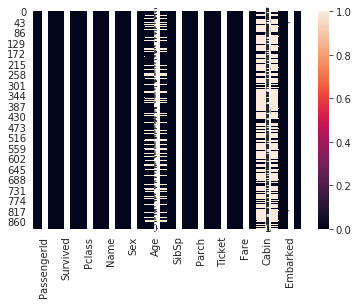

In [248]:
sns.heatmap(titanic_data.isnull(), annot = True)

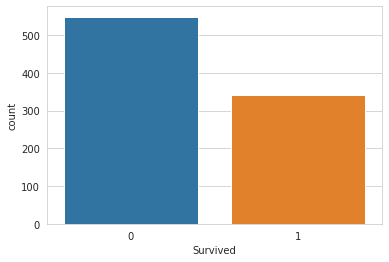

In [249]:
sns.set_style('whitegrid')
sns.countplot(x = "Survived", data = titanic_data)

In [250]:
titanic_data["Sex"].unique()

array(['male', 'female'], dtype=object)

In [251]:
titanic_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

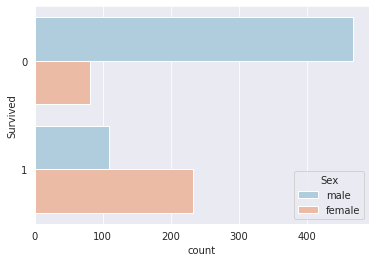

In [252]:
sns.set_style("darkgrid")
sns.countplot(y = "Survived", hue = "Sex", data = titanic_data,  palette = 'RdBu_r')

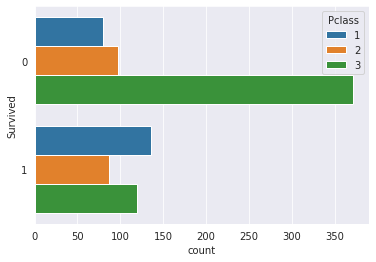

In [253]:
sns.set_style('darkgrid')
sns.countplot(y = "Survived", hue = 'Pclass', data = titanic_data)

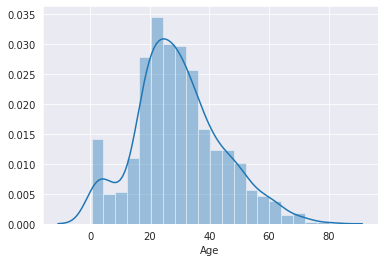

In [254]:
sns.distplot(titanic_data["Age"].dropna(), kde = True)

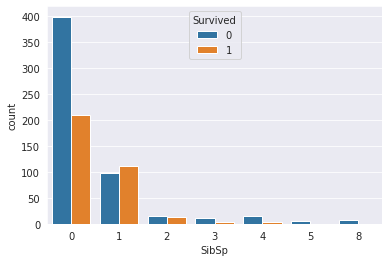

In [255]:
sns.countplot(titanic_data["SibSp"],hue = titanic_data["Survived"],data = titanic_data)

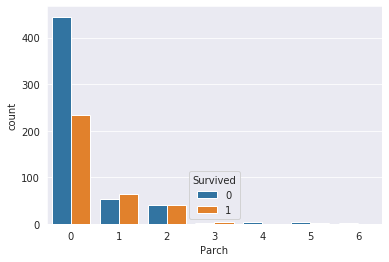

In [256]:
sns.countplot(x= "Parch", hue = "Survived", data = titanic_data)

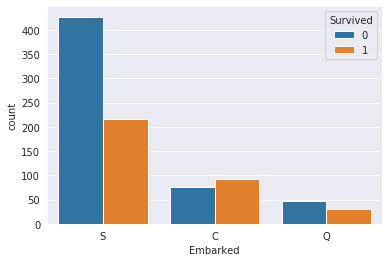

In [257]:
sns.countplot(titanic_data["Embarked"],hue = titanic_data["Survived"],data = titanic_data)

# Some Important things here to know.

In [258]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# checking of correlation 

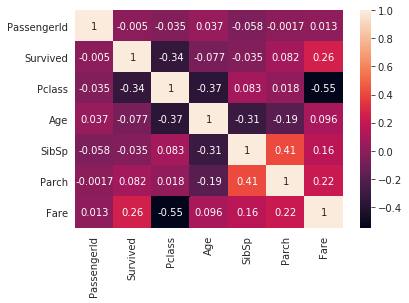

In [259]:
sns.heatmap(titanic_data.corr(), annot = True)

# Data Cleaning

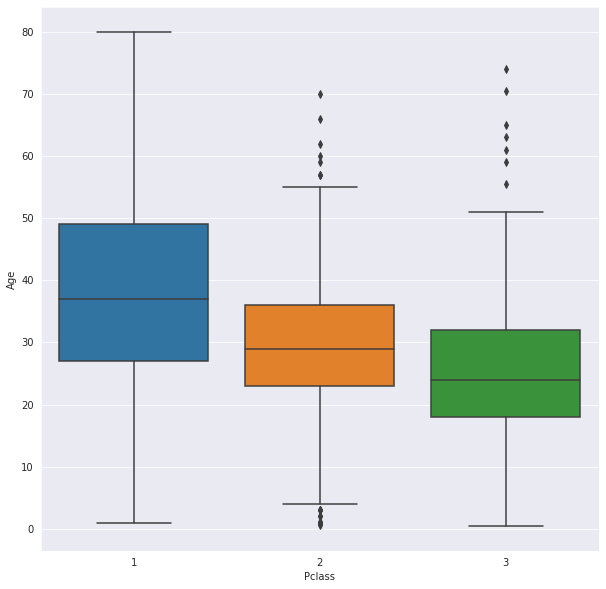

In [260]:
plt.figure(figsize = (10,10))
sns.boxplot(x = "Pclass", y= "Age", data = titanic_data)

In [261]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 28
        else:
            return 25
    
    else:
        return Age

In [262]:
titanic_data["Age"] = titanic_data[["Age", "Pclass"]].apply(impute_age, axis = 1)
titanic_data["Fare"] = titanic_data["Fare"].fillna(titanic_data["Fare"].mean())

In [263]:
titanic_data = titanic_data.drop(['Name','Ticket','Cabin','Embarked','SibSp','Parch'], axis=1)

In [264]:
sex_mapping = {'male' : 0, 'female' : 1}
titanic_data["Sex"] = titanic_data["Sex"].map(sex_mapping)

In [265]:
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare
0,1,0,3,0,22.0,7.2500
1,2,1,1,1,38.0,71.2833
2,3,1,3,1,26.0,7.9250
3,4,1,1,1,35.0,53.1000
4,5,0,3,0,35.0,8.0500


# Handling outliers

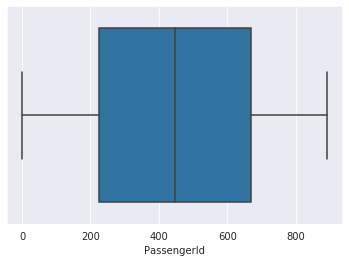

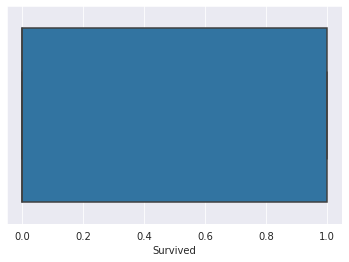

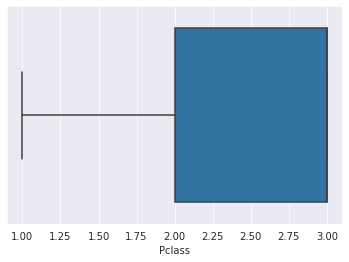

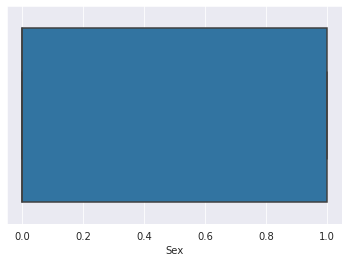

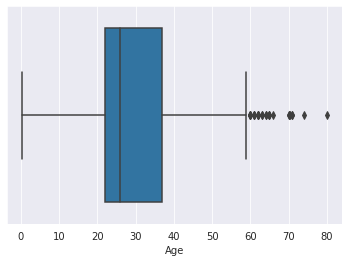

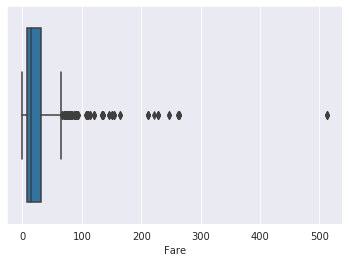

In [266]:
for i in titanic_data:
    sns.boxplot(titanic_data[i])
    plt.show()

In [267]:
from scipy.stats import zscore
z = np.abs(zscore(titanic_data))
threshold = 3
print(np.where(z > 3))
newdata = titanic_data[(z < 3).all(axis=1)]
print("data before :", titanic_data.shape)
print("data after :", newdata.shape)
titanic_data = newdata

(array([ 27,  88,  96, 116, 118, 258, 299, 311, 341, 377, 380, 438, 493,
       527, 557, 630, 672, 679, 689, 700, 716, 730, 737, 742, 745, 779,
       851]), array([5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 4, 4, 5, 5, 5, 5, 5,
       5, 5, 4, 5, 4]))
data before : (891, 6)
data after : (864, 6)


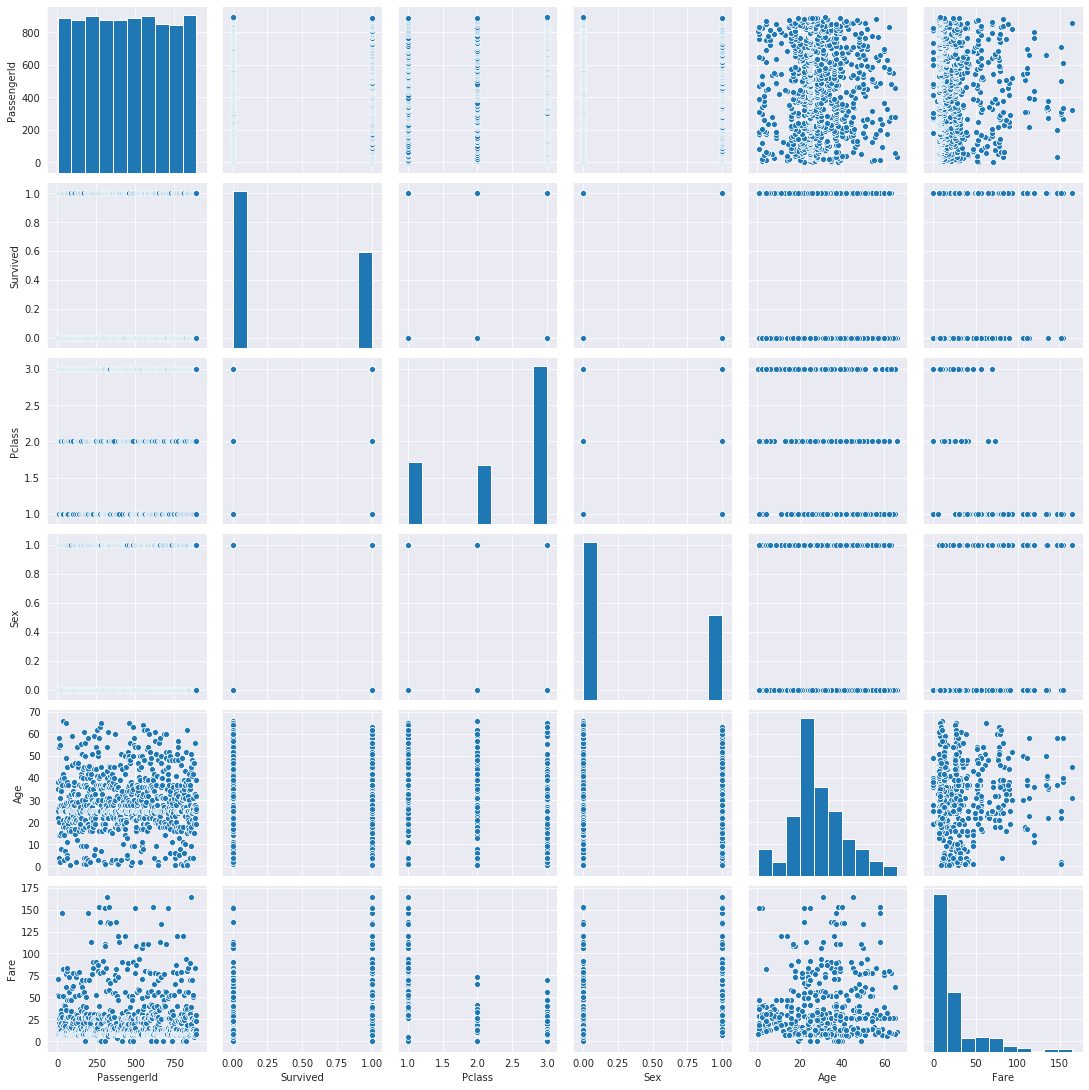

In [268]:
sns.pairplot(titanic_data)

# lets divide the training and testing data

In [269]:
x = titanic_data.drop(columns = ["Survived"], axis = 1)
y = titanic_data["Survived"]

In [270]:
print(x.shape,y.shape)

(864, 5) (864,)


In [271]:
from sklearn.preprocessing import power_transform
new_x = pd.DataFrame(power_transform(x, method = "yeo-johnson"), columns=x.columns)
x = new_x

In [272]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
data_x = pd.DataFrame(scalar.fit_transform(x), columns = x.columns)
x = data_x

# Model Creation

In [273]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold

In [274]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 100)
print(x.shape, x_train.shape,x_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(864, 5) (578, 5) (286, 5)
(864,) (578,) (286,)


In [275]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('NB', GaussianNB()))
models.append(('DEC', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('RAN', RandomForestClassifier()))
models.append(('ADA', AdaBoostClassifier()))



results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=100)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
    
    results.append(cv_results)
    names.append(name)
    
    msg = '%s: %f, %f' % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.806201, 0.042905
NB: 0.764640, 0.038335
DEC: 0.735178, 0.043122
KNN: 0.801028, 0.039854
SVC: 0.807925, 0.056479
RAN: 0.825287, 0.068405
ADA: 0.792347, 0.048317


In [276]:
knn = KNeighborsClassifier()
svc = SVC()

In [277]:
model = [knn, svc]

for m in model:
    m.fit(x_train, y_train)
    m.score(x_train,y_train)
    prediction = m.predict(x_test)
    print("Accuracy of model",m,"\nis:",accuracy_score(y_test, prediction))
    print('\n')
    print(confusion_matrix(y_test, prediction))
    print(classification_report(y_test, prediction))
    print("\n")
    


Accuracy of model KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') 
is: 0.7797202797202797


[[154  27]
 [ 36  69]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       181
           1       0.72      0.66      0.69       105

    accuracy                           0.78       286
   macro avg       0.76      0.75      0.76       286
weighted avg       0.78      0.78      0.78       286



Accuracy of model SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 
is: 0.8076923076923077


[[162  19]
 [ 36  69]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.85  

# cross_val_score

In [280]:
scr1 = cross_val_score(knn, x, y, cv=5)
scr2 = cross_val_score(svc, x, y, cv=5)
print("the cross val score of Kneares neighbor is :",scr1.mean()*100)
print("the cross val score of Svc is :",scr2.mean()*100)

the cross val score of Kneares neighbor is : 81.1352332302729
the cross val score of Svc is : 81.36644710310526


# Hyper parameter tuning with Gridsearchcv

In [302]:
from sklearn.model_selection import GridSearchCV

svc_params = {
    'kernel': ['rbf','linear','sigmoid'],
    'C' : [0.1, 1, 10, 100],
    'gamma' :  [0.1, 1, 10, 100],
    'degree' : [0, 1, 2, 3, 4, 5, 6]
    
}

knn_params = {
    'n_neighbors': [5,10,15,20,25],
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [303]:
GSV = GridSearchCV(SVC(), svc_params, n_jobs=-1, cv = 5)
GSV1 = GridSearchCV(KNeighborsClassifier(), knn_params, n_jobs=-1, cv = 5)

In [304]:
GSV.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'degree': [0, 1, 2, 3, 4, 5, 6],
                         'gamma': [0.1, 1, 10, 100],
                         'kernel': ['rbf', 'linear', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [305]:
GSV1.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [5, 10, 15, 20, 25],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [306]:
print(GSV.best_params_)
print(GSV1.best_params_)

{'C': 100, 'degree': 0, 'gamma': 0.1, 'kernel': 'rbf'}
{'algorithm': 'auto', 'n_neighbors': 15, 'weights': 'distance'}


In [310]:
svc1 = SVC(C = 100, kernel = 'rbf', degree = 0, gamma = 0.1)
knn1 = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 15, weights =  'distance')

hyp_models = [svc1, knn1]
for n in hyp_models:
    n.fit(x_train,y_train)
    predictn = svc1.predict(x_test)
    print(accuracy_score(y_test, predictn))
    print(confusion_matrix(y_test, predictn))
    print(classification_report(y_test, predictn))
    print('\n')

0.8076923076923077
[[162  19]
 [ 36  69]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.85       181
           1       0.78      0.66      0.72       105

    accuracy                           0.81       286
   macro avg       0.80      0.78      0.78       286
weighted avg       0.81      0.81      0.80       286



0.8076923076923077
[[162  19]
 [ 36  69]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.85       181
           1       0.78      0.66      0.72       105

    accuracy                           0.81       286
   macro avg       0.80      0.78      0.78       286
weighted avg       0.81      0.81      0.80       286





In [311]:
import joblib

joblib.dump(knn1, "knnbestmodel.obj")

['knnbestmodel.obj']

In [313]:
joblib.dump(svc1, "svcbestmodel.obj")

['svcbestmodel.obj']

In [320]:
model1 = joblib.load("svcbestmodel.obj")

# conclusion

In [318]:
import numpy as np
a = np.array(y_test)
predicted =  np.array(svc1.predict(x_test))
submission = pd.DataFrame({'passengerid' : titanic_data['PassengerId'], 'original' : a, "predicted": predicted}, index=range(len(a)))

In [323]:
submission.head()

,passengerid,original,predicted
0,1.0,1,1
1,2.0,1,1
2,3.0,0,0
3,4.0,0,0
4,5.0,0,1
